# Exercise 5 Andersen thermostat

## Exersise 5. 1 
Implement Andersen thermostat into the MD velocity verlet algorithm

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

### Functions definitions

In [2]:
#Initialization of velocities and positions of particles
def init(n_particles, L_sys, Temp):
    numpy.random.seed(1292) #empyrical number
    position = L_sys*numpy.random.rand(n_particles, 3)
    velocity = numpy.random.normal(0, 3.*Temp, (n_particles, 3))
    
    v_ave = sum(velocity)/n_particles
    velocity -= v_ave  #shifting the center of the velocity distribution
    v_variance = numpy.var(velocity, axis = 0)
    velocity *=(3*Temp/sum(v_variance))**0.5  # Changing temperature by scaling velocities

    return position, velocity

In [3]:
#Andersen Thermostat
def thermAndersen(velocity, Temp, dt, nu, n_particles):
    for i in xrange(n_particles):
        if numpy.random.rand() < nu*dt:
            velocity[i,:] = numpy.random.normal(0, 3.*Temp, (1, 3))        
    return velocity

In [4]:
#Determine the forces of LJ potential
def force(position, L_sys):
    energy_p = 0.
    n_par = len(position)
    rc2 = 2.**(1./3.)
    forces = numpy.zeros((n_par, 3))
    for i in xrange(n_par - 1):
        for j in xrange(i + 1, n_par):
            r  = position[i] - position[j]
            r -= L_sys*numpy.rint(r/L_sys) #Periodic boundary conditions
            r2 = numpy.sum(numpy.square(r))
            if r2 < rc2:
                r2i = 1./r2
                r6i = r2i**3
                ff = 48.*r2i*r6i*(r6i - 0.5)
                r *= ff
                forces[i] += r
                forces[j] -= r
                energy_p += 4.*r6i*(r6i - 1.) + 1.
    return forces, energy_p

In [5]:
def velocity_verlet(position, velocity, forces, L_sys, dt):
    position = position + dt*velocity
    position += 0.5*dt**2*forces
    position = (position + 2.*L_sys)%L_sys #Periodic boundary conditions
    velocity += 0.5*dt*forces
    forces, energy_p = force(position, L_sys)
    velocity += 0.5*dt*forces
    energy_k = 0.5*sum(sum(numpy.square(velocity)))
    return position, velocity, forces, energy_k, energy_p

In [6]:
def euler(position, velocity, forces, L_sys, dt):
    forces, energy_p = force(position, L_sys)
    position = position + dt*velocity
    position = (position + 2.*L_sys)%L_sys #Periodic boundary conditions
    velocity += dt*forces
    energy_k = 0.5*sum(sum(numpy.square(velocity)))
    return position, velocity, forces, energy_k, energy_p

In [7]:
def steepestDescent(position, forces, L_sys):
    f_maxim = numpy.sum(numpy.square(forces), axis=1)
    f_max   = numpy.max(f_maxim)
    f_max   = f_max**0.5
    position = position + 0.02*forces/f_max
    position = (position + 2.*L_sys)%L_sys #Periodic boundary conditions
    return position

0.393774695173
0.268757707953
0.125328940479
0.0371492475249
0.0314284716578
0.00936899494709
0.00690912862521
0.00758984253405
0.00823403090474
0.00211584300257


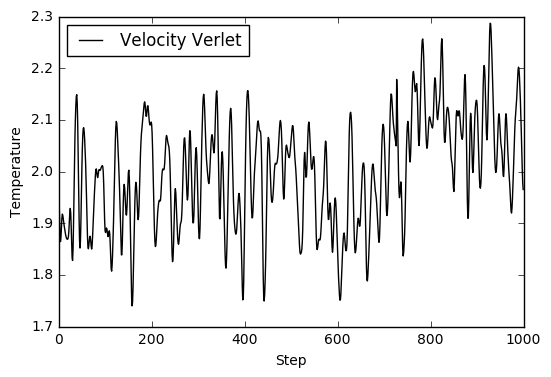

In [ ]:
#Parameter setting
n_particles = 100      #The number of particles
L_sys       = 5.     #The length of system
Temperature = 2.      #The temperature of system
dt          = 0.005  #The incremantation of the time per step
n_step      = 1000  #The total time step
nu          = 0.01

#Initialization
position, velocity = init(n_particles, L_sys, Temperature)
forces, energy_p = force(position, L_sys)

for i in xrange(10):
    for j in xrange(200):
        forces, energy_p = force(position, L_sys)
        position = steepestDescent(position, forces, L_sys)
    print energy_p
    
data_velocity    = []
data_temperature = []

#MD loop of velocity verlet algorithm
forces, energy_p = force(position, L_sys)
for i in xrange(n_step):
    position, velocity, forces, energy_k, energy_p = velocity_verlet(position, velocity, forces, L_sys, dt)
    velocity = thermAndersen(velocity, Temperature, dt, nu, n_particles)
for i in xrange(n_step):
    position, velocity, forces, energy_k, energy_p = velocity_verlet(position, velocity, forces, L_sys, dt)
    velocity = thermAndersen(velocity, Temperature, dt, nu, n_particles)
    data_velocity.append(numpy.reshape(velocity, (3*n_particles, 1)))
    data_temperature.append(2.*energy_k/(3.*n_particles))

#Drawing the graph
plt.xlabel("Step")
plt.ylabel('Temperature')
plt.plot(data_temperature, 'k', label=b'Velocity Verlet')
plt.legend(loc='upper left')
plt.show()

n, bins, patches = plt.hist(data_velocity, 50, normed=1, facecolor='g', alpha=0.75)
plt.xlabel(r'$v$')
plt.ylabel(r'Probability P(v)')
plt.title('Histogram of $v$')
plt.axis([-5, 5, 0, 0.5])
plt.grid(False)
plt.show()

In [31]:
numpy.sum([[0, 1], [0, 5]], axis=0)

array([0, 6])